<a href="https://colab.research.google.com/github/jmestanza/PASA_TP1_Echo_cancellation/blob/master/Example_GRURIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
""" Example for computing the RIR between several sources and receivers in GPU.
"""
!pip install https://github.com/DavidDiazGuerra/gpuRIR/zipball/master
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from math import ceil
from scipy.io import wavfile
import gpuRIR

     \ 3.7MB 1.2MB/s
  Created wheel for gpuRIR: filename=gpuRIR-1.2.0-cp36-cp36m-linux_x86_64.whl size=907220 sha256=836f5833e6bce1deb47584821715f8434c08b357894bef8fa5cd6e26df82e393
  Stored in directory: /tmp/pip-ephem-wheel-cache-n2xnza7w/wheels/d6/80/3f/6af7d0e500b38d174f793d6b8ff6a0984b1eab8b2c8f6665ae
Successfully built gpuRIR


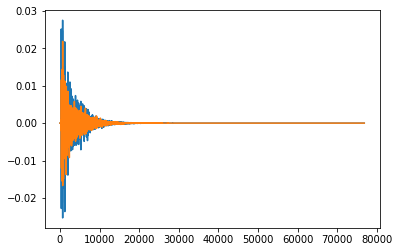

In [23]:
""" Example for simulating the recording of a moving source with a microphone array.
You need to have a 'source_signal.wav' audio file to use it as source signal and it will generate
the file 'filtered_signal.wav' with the stereo recording simulation.
"""

gpuRIR.activateMixedPrecision(False)

fs, source_signal = wavfile.read('/content/music_original.wav')
source_signal = source_signal[:,0]
source_signal = [1] + [0] * fs

room_sz = [3,4,2.5]  # Size of the room [m]
traj_pts = 64  # Number of trajectory points
pos_traj = np.tile(np.array([0.0,3.0,1.0]), (traj_pts,1))
pos_traj[:,0] = np.linspace(0.1, 2.9, traj_pts) # Positions of the trajectory points [m]
nb_rcv = 1 # Number of receivers
pos_rcv = np.array([[1.4,1,1.5],[1.6,1,1.5]])	 # Position of the receivers [m]
orV_rcv = np.array([[-1,0,0],[1,0,0]])
mic_pattern = "card" # Receiver polar pattern
T60 = 0.6 # Time for the RIR to reach 60dB of attenuation [s]
att_diff = 15.0	# Attenuation when start using the diffuse reverberation model [dB]
att_max = 60.0 # Attenuation at the end of the simulation [dB]

beta = [0.99]*5+[0.5] # Absortion coefficient ratios of the walls

#beta = gpuRIR.beta_SabineEstimation(room_sz, T60) # Reflection coefficients
Tdiff= gpuRIR.att2t_SabineEstimator(att_diff, T60) # Time to start the diffuse reverberation model [s]
Tmax = gpuRIR.att2t_SabineEstimator(att_max, T60)	 # Time to stop the simulation [s]
nb_img = gpuRIR.t2n( Tdiff, room_sz )	# Number of image sources in each dimension
RIRs = gpuRIR.simulateRIR(room_sz, beta, pos_traj, pos_rcv, nb_img, Tmax, fs, Tdiff=Tdiff, orV_rcv=orV_rcv, mic_pattern=mic_pattern)

filtered_signal = gpuRIR.simulateTrajectory(source_signal, RIRs)
wavfile.write('filtered_signal.wav', fs, filtered_signal)
plt.plot(filtered_signal)
plt.show()

In [24]:
from IPython.display import Audio
Audio(filtered_signal[:,0] / 5000,rate=fs)

